<a href="https://colab.research.google.com/github/s27dsam/DS_learn/blob/main/gold_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold = pd.read_csv('/content/gold_data.csv')

In [3]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gold.shape

(2290, 6)

cheaking for missing values 

In [7]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
corr = gold.corr()

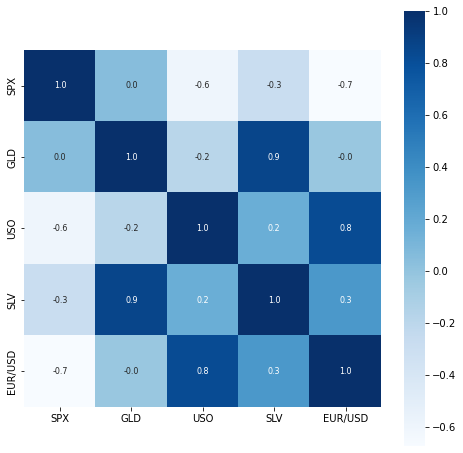

In [12]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [13]:
print(corr)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


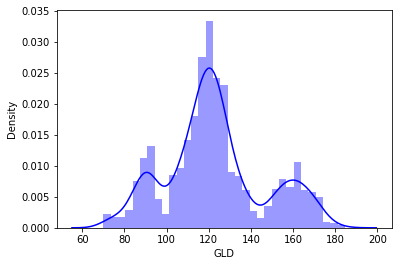

In [15]:
# checking the distribution of the GLD Price
sns.distplot(gold['GLD'],color='blue')

In [17]:
X = gold.drop(['Date','GLD'],axis=1)
Y = gold['GLD']

In [18]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [19]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [23]:
test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.59819961  81.83359978 116.1256     127.81130102 120.53030157
 154.91779752 150.07719875 126.0069005  117.45019877 126.05000057
 116.47330129 172.14390102 141.35779892 167.85819866 115.19210009
 117.62270051 139.0212033  170.39750125 159.56130334 156.51549934
 155.10400018 125.34320021 175.66269997 157.44220341 125.19150059
  93.90290003  77.12130013 120.50500015 119.10509973 167.49480013
  88.28520082 125.02580009  91.13480086 117.72430069 121.12789939
 135.87650127 115.68180119 115.38450072 146.98180039 107.20160113
 104.66880246  87.19069781 126.43480098 117.69889998 152.81869846
 119.75070014 108.46059952 108.22149849  93.13230036 127.18159751
  75.20150021 113.69839922 121.15409993 111.3663991  118.83159868
 121.02719912 159.53880024 169.15470141 146.94119654  85.74419839
  94.34690031  86.76819878  90.44320006 118.97160049 126.40530113
 127.74040038 170.62700111 122.27269943 117.56019904  98.66150062
 168.97890152 143.24279867 132.32410274 121.21440215 120.67749931
 119.67280

In [25]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.989044972414953


In [26]:
Y_test = list(Y_test)

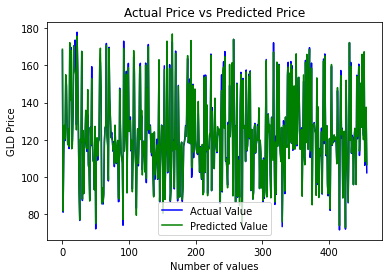

In [27]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()